# Add surfaces to an object
Here, we show a procedure to add an structured surface to an object. The surafaces are to lenses. The first one is an Frsnel lens, and the second surface is an stardard lens.

Two examples are performed. Add the surfaces to a layer and to a biprism

In [1]:
from diffractio import sp, nm, plt, np, mm, degrees, um
from diffractio.scalar_sources_X import Scalar_source_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X

In [2]:
x0 = np.linspace(-.15 * mm, .15 * mm, 2048)
z0 = np.linspace(-25 * um, 400 * um, 2048)
wavelength = 10 * um
n_background = 1


In [3]:
u0 = Scalar_source_X(x0, wavelength)
u0.plane_wave()

##  Surfaces


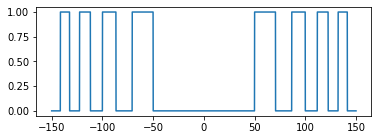

In [4]:
surface_1 = Scalar_mask_X(x0, wavelength, n_background=1, info='')

h1 = surface_1.fresnel_lens(x0=0.0,
                            focal=.25 * mm,
                            binary=True,
                            kind='phase',
                            phase=sp.pi,
                            radius=1 * mm)

plt.figure(figsize=(6, 2))
plt.plot(surface_1.x, h1.real)


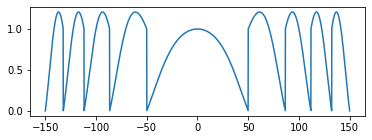

In [5]:
surface_2 = Scalar_mask_X(x0, wavelength, n_background=1, info='')
h2 = surface_2.fresnel_lens(x0=0.0,
                            focal=-.25 * mm,
                            binary=False,
                            kind='phase',
                            phase=sp.pi,
                            radius=1 * mm)

plt.figure(figsize=(6, 2))
plt.plot(surface_2.x, h2.real)


In [6]:
fx1 = surface_1.x, h1 * wavelength
fx2 = surface_2.x, h2 * wavelength


## Layer

In [7]:
layer = Scalar_mask_XZ(x0, z0, wavelength, n_background=n_background, info='')
#lente3.biprism(r0=(0,0), length=.3*mm, height=.25*mm, refraction_index=1.5);
layer.layer(r0=(0 * mm, 50 * um),
            refraction_index=1.5,
            depth=100 * um,
            angle=0)


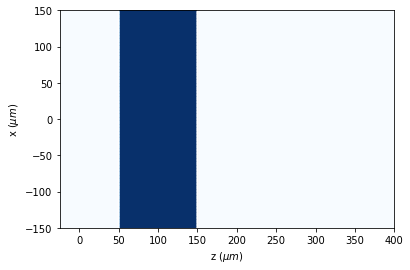

In [8]:
layer.draw_refraction_index()


In [9]:
layer.add_surfaces(fx=(fx1, fx2),
                   refraction_index=1.5,
                   x_sides=[-1 * mm, 1 * mm],
                   min_incr=0.1,
                   angle=0 * degrees)


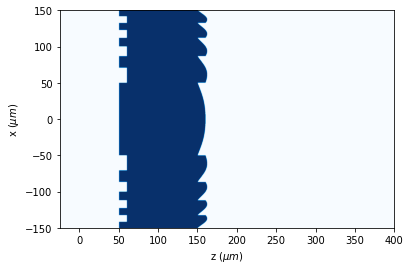

In [10]:
layer.draw_refraction_index(draw_borders=False)
layer.smooth_refraction_index(pixels_filtering=2 * um,
                              draw_check=False,
                              max_diff_filter=0.1)


**Propagation**

In [11]:
layer.incident_field(u0)

In [12]:
layer.clear_field()
layer.BPM(verbose=True)

Time = 1.18 s, time/loop = 0.577 ms


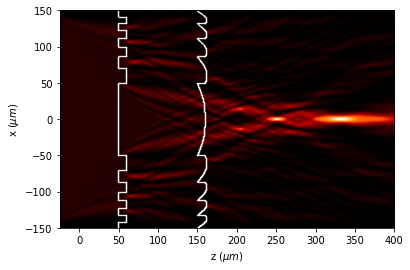

In [13]:
layer.draw(logarithm=False, normalize='maximum', draw_borders=True)


## Biprism

In [14]:
biprism = Scalar_mask_XZ(x0,
                         z0,
                         wavelength,
                         n_background=n_background,
                         info='')
biprism.biprism(r0=(0, 0),
                length=.3 * mm,
                height=.25 * mm,
                refraction_index=1.5)


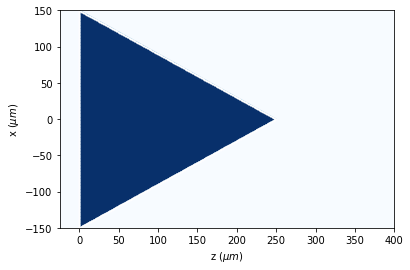

In [15]:
biprism.draw_refraction_index()


In [16]:
biprism.add_surfaces(fx=(fx1, fx2),
                     refraction_index=1.5,
                     x_sides=[-1 * mm, 1 * mm],
                     min_incr=0.1,
                     angle=0 * degrees)


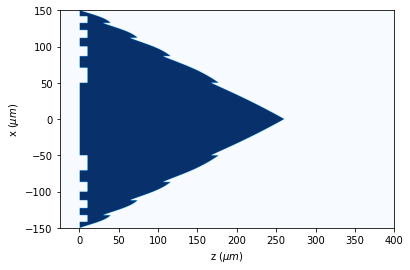

In [17]:
biprism.draw_refraction_index(draw_borders=False)


In [18]:
biprism.smooth_refraction_index(pixels_filtering=2 * um,
                                draw_check=False,
                                max_diff_filter=0.1)


**Propagation**

In [19]:
biprism.incident_field(u0)

In [20]:
biprism.clear_field()
biprism.BPM(verbose=True)

Time = 0.86 s, time/loop = 0.4193 ms


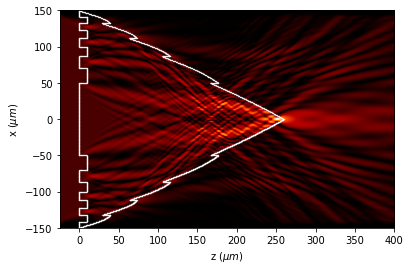

In [21]:
biprism.draw(logarithm=1e0, normalize='maximum', draw_borders=True)
